# dopplerPy library
Identificar paper autor etc.
## Example case  

In [1]:
#-*-coding:utf8-*-
import numpy as np
import pandas as pd
import sys
import os
from IPython.display import Markdown as md
from matplotlib import pyplot as plt
import matplotlib as  mpl
#import statsmodels.api as sm
#from pylab import rcRapams
plt.style.use('default')

homeSys=os.getcwd()
if homeSys in sys.path:
    pass
else:
    sys.path.append(homeSys)

In [2]:
import cv2 as cv2 

from dopplerPy import dopplerindclass as di
import logging

In [3]:
#sys.path.remove('')

# Single image processing
## Creating a object of `doppimg` class (gamma extracted from image metadata)


In [4]:
home=homeSys
oDir=os.path.join(home,'results/')
pth0=os.path.join(home,'dopplerPy/data/RawData/')
exampleImPth=os.path.join(pth0,"2022-01-11-0016_34n/ca70a6c6-a138-4de5-a8ec-7bfc4edfc7f3/usimage202201110016131816828_P1.jpg")

Single image reading ...

In [5]:
dopA=di.doppimg(exampleImPth)#

Gamma readed from image:0.454545


Image Format, Gamma and structure can be checked with __identify__ command, from __ImageMagick__ package (version 6.9.11-60 Q16 x86_64).


In [6]:
%%bash
pth0=dopplerPy/data/RawData/2022-01-11-0016_34n/ca70a6c6-a138-4de5-a8ec-7bfc4edfc7f3/usimage202201110016131748105_C1.jpg
identify -verbose $pth0|grep Format
identify -verbose $pth0|grep Gamma
identify -verbose $pth0|grep Geometry
identify -verbose $pth0|grep -A3 Channel\ depth

  Format: JPEG (Joint Photographic Experts Group JFIF format)
  Gamma: 0.454545
  Geometry: 776x568+0+0
  Channel depth:
    red: 8-bit
    green: 8-bit
    blue: 8-bit


## Blood flow estimation  
The `vasc` method with 'typ' parameter as 'values' retrieve a dictionary which can be showed as a `pandas`Data Frame.

In [7]:
pd.DataFrame(dopA.vasc(type='values'),index=['dopA'])

vfp    vfEp    vfn    vfEn    vft   vfEt    vap    vaEp    van  \
dopA  4.5516  0.0146  0.805  0.0129  5.357  0.019  0.669  0.0133  0.144   

        vaEn    vat   vaEt  
dopA  0.0128  0.813  0.018

In [8]:

symb= ['$\Phi_{(+)}$', '$\epsilon_{\Phi_{(+)}}$',\
                '$\Phi_{(-)}$','$\epsilon_{\Phi_{(-)}}$',\
               '$\Phi$', '$\epsilon_{\Phi}$', '$\Theta_{(+)}$', '$\epsilon_{\Theta_{(+)}}$', '$\Theta_{(-)}$',\
                '$\epsilon_{\Theta_{(-)}}$', '$\Theta$','$\epsilon_{\Theta}$']
desc=['Positive blood flow','Positive blood flow error','Negative blood flow','Negative blood flow error',\
      'Total blood flow','Total blood flow error',\
      'Positive vascularized area','Positive vascularized area error',\
      'Negative vascularized area','Negative vascularized area error',\
      'Total vascularized area','Total vascularized area error']
units=['$\\frac{cm^3}{s}$','$\\frac{cm^3}{s}$','$\\frac{cm^3}{s}$','$\\frac{cm^3}{s}$','$\\frac{cm^3}{s}$','$\\frac{cm^3}{s}$',\
      '$cm^2$','$cm^2$','$cm^2$','$cm^2$','$cm^2$','$cm^2$']
fields={'field':list(dopA.vasc(type='values').keys()),'symb':symb,'desc':desc,'units':units}                

Fields description.

In [9]:
pd.DataFrame(fields)

field                       symb                              desc  \
0    vfp               $\Phi_{(+)}$               Positive blood flow   
1   vfEp    $\epsilon_{\Phi_{(+)}}$         Positive blood flow error   
2    vfn               $\Phi_{(-)}$               Negative blood flow   
3   vfEn    $\epsilon_{\Phi_{(-)}}$         Negative blood flow error   
4    vft                     $\Phi$                  Total blood flow   
5   vfEt          $\epsilon_{\Phi}$            Total blood flow error   
6    vap             $\Theta_{(+)}$        Positive vascularized area   
7   vaEp  $\epsilon_{\Theta_{(+)}}$  Positive vascularized area error   
8    van             $\Theta_{(-)}$        Negative vascularized area   
9   vaEn  $\epsilon_{\Theta_{(-)}}$  Negative vascularized area error   
10   vat                   $\Theta$           Total vascularized area   
11  vaEt        $\epsilon_{\Theta}$     Total vascularized area error   

               units  
0   $\frac{cm^3}{s}$  
1   $\frac{cm^3}{s}$  
2   $\frac{cm^3}{s}$  
3   $\frac{cm^3}{s}$  
4   $\frac{cm^3}{s}$  
5   $\frac{cm^3}{s}$  
6             $cm^2$  
7             $cm^2$  
8             $cm^2$  
9             $cm^2$  
10            $cm^2$  
11            $cm^2$

## Displaying the  __Colour Flow Box__ 
`gamma` argument is setted to 1 to better visualization

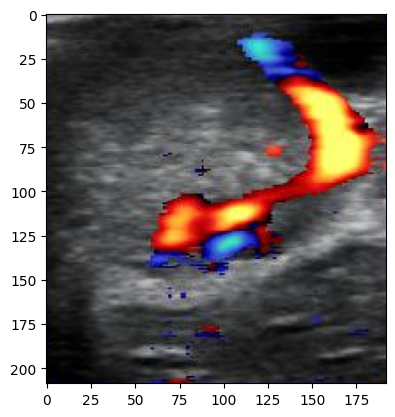

In [10]:
plt.imshow(di.doppimg(exampleImPth,gamma=1).colorBx)# gamma=1 to visualization

## Ancilliary data 
An `doppimg` class object have some methods which can be used to extract ancilliary data.


### Blood velocity - colour calibrations  
`lmP` and `lmN`: Positive range and negative range fitteds models    
`dCal`: regressions input data frame readed from Colour Flow Scale   
`minP` and `minN`: Positive and negative ranges minimum lightness of valid prediction  
`colRanges`: Colour components ranges of valid prediction

In [11]:
dopA.colCal()

{'lmP': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f9ea81894b0>,
 'lmN': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f9e1c477460>,
 'dCal':     dir  row           L         nu
 83    p   83    0.000000   0.000000
 79    p   79    7.933333   0.702439
 75    p   75   15.166667   1.404878
 71    p   71   22.466667   2.107317
 67    p   67   32.733333   2.809756
 63    p   63   45.966667   3.512195
 59    p   59   56.200000   4.214634
 55    p   55   68.600000   4.917073
 51    p   51   73.033333   5.619512
 47    p   47   81.566667   6.321951
 43    p   43   93.000000   7.024390
 39    p   39   99.166667   7.726829
 35    p   35  109.200000   8.429268
 31    p   31  118.566667   9.131707
 27    p   27  126.766667   9.834146
 23    p   23  139.266667  10.536585
 19    p   19  148.166667  11.239024
 15    p   15  159.866667  11.941463
 11    p   11  171.433333  12.643902
 7     p    7  177.133333  13.346341
 3     p    3  181.066667  14.04878

In [12]:
dir(dopA)

['Kx',
 'Ky',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cal',
 'colCal',
 'colorBx',
 'colorSK',
 'deltaA',
 'deltaNuInst',
 'displayBx',
 'gamma',
 'getColorBox',
 'im',
 'pixelA',
 'pth',
 'pxBy5cm',
 'sampleDopplerColorSkl',
 'vasc']

# Full collection processing  


In [13]:
%%script false --no-raise-error
%%bash 
pth0=dopplerPy/data/RawData
oDir=results/
source ~/NEWENV/bin/activate
python3 dopplerPy/doppGral.py  --saveCfbx True   -i$pth0 -o$oDir
